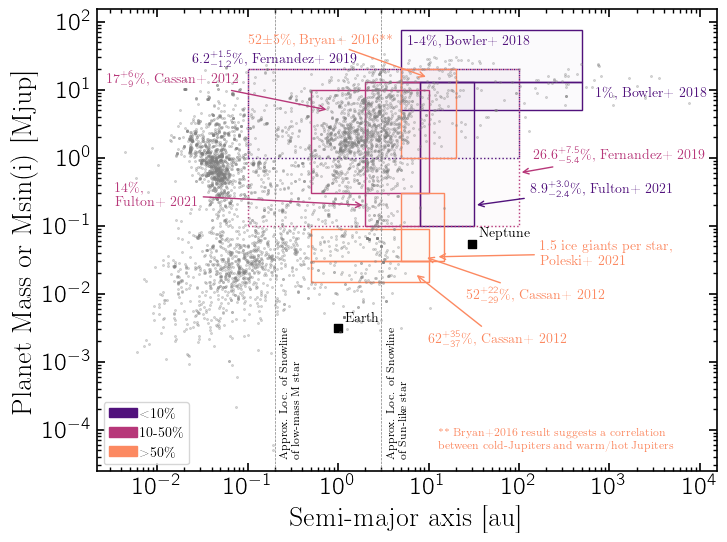

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

p = pd.read_csv('exoplanetarchive-massperiod-20230717.csv', comment='#')

def AddFilledRectangle(ml,mh,al,ah,lw,ls,edgecolor,facecolor,alpha):
    w = ah - al
    h = mh - ml
    r = Rectangle([al,ml], w, h, linewidth=lw, ls = ls, edgecolor=edgecolor,
                  facecolor=facecolor, alpha=alpha)
    plt.gca().add_patch(r)
def AddRectangle(ml,mh,al,ah,lw,ls,edgecolor,alpha):
    w = ah - al
    h = mh - ml
    r = Rectangle([al,ml], w, h, linewidth=lw, ls = ls, edgecolor=edgecolor,
                  facecolor='None', alpha=alpha)
    plt.gca().add_patch(r)


%matplotlib inline
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle


import matplotlib
cmap = matplotlib.cm.get_cmap('magma')
n = 5
ncolors = np.linspace(0,1,n)
color10,color,color50 = cmap(ncolors)[1:4]#[:3]#

# Plot planets:
plt.plot(p['pl_orbsmax'],p['pl_bmassj'], marker='.', markersize=3, color='grey', ls='None', alpha=0.3)

# Mark snowlines:
plt.axvline(x=3, ls='--', lw=0.5, color='grey')
plt.axvline(x=0.2, ls='--', lw=0.5, color='grey')
plt.annotate('Approx. Loc. of Snowline \n of Sun-like star', xy = (3.5,4e-5), rotation=90,
            fontsize = 8)
plt.annotate('Approx. Loc. of Snowline \n of low-mass M star', xy = (0.23,4e-5), rotation=90,
            fontsize = 8)

# Plot solar system planets
plt.scatter(30.07,0.0539531012, marker='s', color='black')
plt.annotate('Neptune', xy=(30.07,0.0539531012), xytext=(5,5), textcoords='offset points')
plt.scatter(1,0.00314558, marker='s', color='black')
plt.annotate('Earth', xy=(1,0.00314558), xytext=(5,5), textcoords='offset points')

# Rectangles
alpha = 0.02
# Bowler 2018 https://ui.adsabs.harvard.edu/abs/2018haex.bookE.155B/abstract
ml, mh = 5, 13
al, ah = 5, 500
AddFilledRectangle(ml,mh,al,ah,2,'-',color10,color10,alpha)
AddRectangle(ml,mh,al,ah,1,'-',color10,1)
plt.annotate(r'1\%, Bowler+ 2018', xy = (ah,ml), xytext = (10,10), textcoords='offset points',
            color=color10)

ml, mh = 13, 75
al, ah = 5, 500
AddFilledRectangle(ml,mh,al,ah,2,'-',color10,color10,alpha)
AddRectangle(ml,mh,al,ah,1,'-',color10,1)
plt.annotate(r'1-4\%, Bowler+ 2018', xy = (al,mh), xytext = (5,-10), textcoords='offset points',
            color=color10)

# Fulton 2021 https://ui.adsabs.harvard.edu/abs/2021ApJS..255...14F/abstract
ml, mh = 0.1, 13
al, ah = 2, 8
AddFilledRectangle(ml,mh,al,ah,2,'-',color,color,alpha)
AddRectangle(ml,mh,al,ah,1,'-',color,1)
plt.annotate('14\%, \n Fulton+ 2021', xy = (al,ml+0.1), xytext = (-180,0), textcoords='offset points',
            color=color, arrowprops=dict(arrowstyle="->", color=color))

ml, mh = 0.1, 13
al, ah = 8, 32
AddFilledRectangle(ml,mh,al,ah,2,'-',color10,color10,alpha)
AddRectangle(ml,mh,al,ah,1,'-',color10,1)
plt.annotate(r'8.9$^{+3.0}_{-2.4}$\%, Fulton+ 2021', xy = (ah,ml+0.1), xytext = (40,10), 
             textcoords='offset points',
            color=color10, arrowprops=dict(arrowstyle="->", color=color10))

# Fernandes 2019: https://ui.adsabs.harvard.edu/abs/2019ApJ...874...81F/abstract
#% between 0.1 and 100 au is {26.6}-5.4+7.5% for planets with masses 0.1-20 M J and
#% decreases to {6.2}-1.2+1.5 % for planets more massive than Jupiter.
ml, mh = 0.1, 20
al, ah = 0.1, 100
AddFilledRectangle(ml,mh,al,ah,2,'-',color,color,alpha)
AddRectangle(ml,mh,al,ah,1,':',color,1)
plt.annotate(r'26.6$^{+7.5}_{-5.4}$\%, Fernandez+ 2019', xy = (ah,ml+0.5), xytext = (10,10), 
             textcoords='offset points',
            color=color, arrowprops=dict(arrowstyle="->", color=color))

ml, mh = 1, 20
al, ah = 0.1, 100
AddFilledRectangle(ml,mh,al,ah,2,'-',color10,color10,alpha)
AddRectangle(ml,mh,al,ah,1,':',color10,1)
plt.annotate(r'6.2$^{+1.5}_{-1.2}$\%, Fernandez+ 2019', xy = (al,mh+0.5), xytext = (-40,5), 
             textcoords='offset points',
            color=color10)

# % Bryan 2016: https://ui.adsabs.harvard.edu/abs/2016ApJ...821...89B/abstract
# % 52 ± 5% over the range 1-20 MJup and 5-20 au
ml, mh = 1, 20
al, ah = 5, 20
AddFilledRectangle(ml,mh,al,ah,2,'-',color50,color50,alpha)
AddRectangle(ml,mh,al,ah,1,'-',color50,1)
plt.annotate(r'52$\pm$5\%, Bryan+ 2016**', xy = (al+5,mh-5), xytext = (-130,25), 
             textcoords='offset points',
            color=color50, arrowprops=dict(arrowstyle="->", color=color50))
plt.annotate('** Bryan+2016 result suggests a correlation \n between cold-Jupiters and warm/hot Jupiters',
            xy = (0.55,0.05), xycoords='axes fraction', color=color50, fontsize=8)

# %Cassan 2012: https://ui.adsabs.harvard.edu/abs/2012Natur.481..167C/abstract
# % 0.5–10 AU
# %on average 17+6−9% of stars host a  Jupiter  (0.3–10 MJ), and 52+22 −29% of stars host 
# Neptune-like planets (10–30 M⊕).
# %super-Earths (5–10 M⊕) are even more common: their respective abundances per star are 62+35−37%
ml, mh = 0.3, 10
al, ah = 0.5, 10
AddFilledRectangle(ml,mh,al,ah,2,'-',color,color,alpha)
AddRectangle(ml,mh,al,ah,1,'-',color,1)
plt.annotate(r'17$^{+6}_{-9}$\%, Cassan+ 2012', xy = (al+0.3,mh-5), xytext = (-160,20), 
             textcoords='offset points',
            color=color, arrowprops=dict(arrowstyle="->", color=color))

ml, mh = 0.03, 0.09
al, ah = 0.5, 10
AddFilledRectangle(ml,mh,al,ah,2,'-',color50,color50,alpha)
AddRectangle(ml,mh,al,ah,1,'-',color50,1)
plt.annotate(r'52$^{+22}_{-29}$\%, Cassan+ 2012', xy = (ah-1,ml+0.005), xytext = (30,-30), 
             textcoords='offset points',
            color=color50, arrowprops=dict(arrowstyle="->", color=color50))

ml, mh = 0.03/2, 0.03
al, ah = 0.5, 10
AddFilledRectangle(ml,mh,al,ah,2,'-',color50,color50,alpha)
AddRectangle(ml,mh,al,ah,1,'-',color50,1)
plt.annotate(r'62$^{+35}_{-37}$\%, Cassan+ 2012', xy = (ah-3,ml+0.005), xytext = (10,-50), 
             textcoords='offset points',
            color=color50, arrowprops=dict(arrowstyle="->", color=color50))


# %Poleski 2021: https://ui.adsabs.harvard.edu/abs/2021AcA....71....1P/abstract
# % On average, every microlensing star hosts 1.4+0.9_-0.6 ice giant planets.
# % I guess that's >100%?  I'm going to adopt ice giant to be down to 10
# % Mearth sort of randomly to match Cassan
ml, mh = 0.03, 0.3
al, ah = 5, 15
AddFilledRectangle(ml,mh,al,ah,2,'-',color50,color50,alpha)
AddRectangle(ml,mh,al,ah,1,'-',color50,1)
plt.annotate('1.5 ice giants per star, \n Poleski+ 2021', xy = (ah-3,ml+0.005), xytext = (75,-5), 
             textcoords='offset points',
            color=color50, arrowprops=dict(arrowstyle="->", color=color50))

import matplotlib.patches as patches
patch10 = patches.Patch(color=color10, label=' <10\%')
patch1050 = patches.Patch(color=color, label=' 10-50\%')
patch50 = patches.Patch(color=color50, label=' >50\%')

plt.legend(handles=[patch10,patch1050,patch50],loc='lower left')

plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.xlabel('Semi-major axis [au]')
plt.ylabel('Planet Mass or Msin(i) [Mjup]')
plt.savefig('exoplanet-occurrence-rates.png',bbox_inches='tight')